In [11]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



<h3>N- Queen Problem</h3>

In [12]:
#custom Fitness
def queeens_max(state):
    fitness_cnt = 0
    for i in range(len(state)-1):
        for j in range(i+1, len(state)):
            # check for attacking pairs
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j-i)) \
                and (state[j] != state[i] - (j-i)):
                
                # if noa attack
                fitness_cnt +=1

    return fitness_cnt

fitness_cust = mlrose_hiive.CustomFitness(queeens_max)
number_of_queens = 33 

problem = mlrose_hiive.DiscreteOpt(length = number_of_queens, fitness_fn = fitness_cust, 
                             maximize = True, max_val = number_of_queens)


experiment_name = "N_Queen"
output_directory = "N_Queen"

In [13]:
possible_attack = 0
for i in range(number_of_queens,0,-1):
    possible_attack += i
possible_attack


561

<h3>MIMC</h3>

In [14]:
%%time

problem = mlrose_hiive.DiscreteOpt(length = number_of_queens, fitness_fn = fitness_cust, 
                             maximize = True, max_val = number_of_queens)

mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name=experiment_name + "_MIMIC",
                               output_directory=output_directory,
                          seed=33,
                          iteration_list=[200],
                          max_attempts=100,
                           population_sizes=[50, 100, 200],
                           keep_percent_list=[0.1, 0.4, 0.8],
#                           population_sizes=[20,50,100],
#                           keep_percent_list=[0.25, 0.5, 0.75],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

Wall time: 8min


In [15]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.024818,489.0,50.0,True,50,0.1,200
1,1,0.277401,502.0,102.0,True,50,0.1,200
2,2,0.516444,502.0,153.0,True,50,0.1,200
3,3,0.815438,502.0,204.0,True,50,0.1,200
4,4,1.118553,502.0,255.0,True,50,0.1,200
...,...,...,...,...,...,...,...,...
1077,99,30.265910,509.0,20101.0,True,200,0.8,200
1078,100,30.574506,509.0,20302.0,True,200,0.8,200
1079,101,30.875617,509.0,20503.0,True,200,0.8,200
1080,102,0.023712,509.0,20704.0,True,200,0.8,200


In [16]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
513.0 507.3333333333333 53.32665476666668
Keep Percent
0.1    504.666667
0.4    510.666667
0.8    506.666667
Name: Fitness, dtype: float64
Population Size
50     506.666667
100    506.000000
200    509.333333
Name: Fitness, dtype: float64
Population Size
50     38.044734
100    55.207542
200    66.727689
Name: Time, dtype: float64


In [17]:
best_index_in_mmc_curve = mmc_run_curves.Fitness.idxmax()
mmc_run_curves.iloc[best_index_in_mmc_curve]


Iteration                 62
Time               18.944338
Fitness                513.0
FEvals                3219.0
use_fast_mimic          True
Population Size           50
Keep Percent             0.4
max_iters                200
Name: 164, dtype: object

In [18]:
best_p_size = mmc_run_curves.iloc[best_index_in_mmc_curve]['Population Size'] 
best_keep = mmc_run_curves.iloc[best_index_in_mmc_curve]['Keep Percent']  
best_curve_mmc = mmc_run_curves.loc[mmc_run_curves['Population Size'] == best_p_size, :]
best_curve_mmc = best_curve_mmc.loc[best_curve_mmc['Keep Percent'] == best_keep, :]
best_curve_mmc.reset_index(inplace=True)
best_p_size, best_keep


(50, 0.4)

Text(0, 0.5, 'Value')

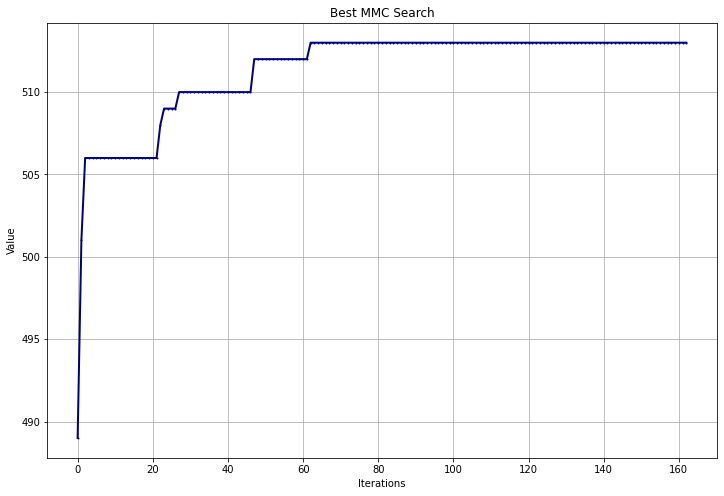

In [19]:
ax = best_curve_mmc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best MMC Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [20]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.024818,489.0,50.0,True,50,0.1,200
1,1,0.277401,502.0,102.0,True,50,0.1,200
2,2,0.516444,502.0,153.0,True,50,0.1,200
3,3,0.815438,502.0,204.0,True,50,0.1,200
4,4,1.118553,502.0,255.0,True,50,0.1,200
...,...,...,...,...,...,...,...,...
1077,99,30.265910,509.0,20101.0,True,200,0.8,200
1078,100,30.574506,509.0,20302.0,True,200,0.8,200
1079,101,30.875617,509.0,20503.0,True,200,0.8,200
1080,102,0.023712,509.0,20704.0,True,200,0.8,200


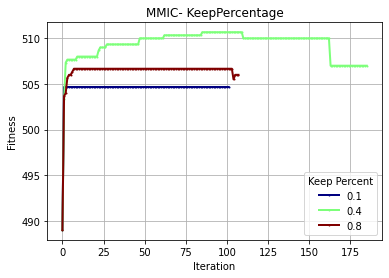

In [21]:
mmc_kp = mmc_run_curves.groupby(['Iteration','Keep Percent']).agg({'Fitness':'mean'}).reset_index()
ax = mmc_kp.pivot_table(values="Fitness", index="Iteration", columns="Keep Percent").plot(lw=2, colormap='jet', 
                                                                                          grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='MMIC- KeepPercentage')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/NQueens/nQueen_mimic_keep_size.png')

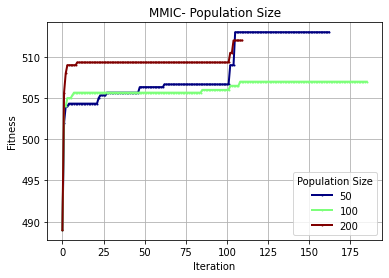

In [22]:
mmc_p = mmc_run_curves.groupby(['Iteration','Population Size']).agg({'Fitness':'mean'}).reset_index()
ax = mmc_p.pivot_table(values="Fitness", index="Iteration", columns="Population Size").plot(lw=2, colormap='jet', 
                                                                                          grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='MMIC- Population Size')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/NQueens/nQueen_mimic_p_size.png')

<h3> RHC </h3>

In [64]:
%%time

problem = mlrose_hiive.DiscreteOpt(length = number_of_queens, fitness_fn = fitness_cust, 
                             maximize = True, max_val = number_of_queens)

runner_return = mlrose_hiive.RHCRunner(problem,
                                       experiment_name=experiment_name+ "_RHC",
                                       output_directory=output_directory,
                                       iteration_list=[500],
                                       seed=33,
                                       restart_list=[10, 50, 100], max_attempts=100)
rhc_run_stats, rhc_run_curves = runner_return.run()

Wall time: 8min 25s


In [65]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.001539,489.0,0.0,10,500,0
1,1,0.014729,491.0,2.0,10,500,0
2,2,0.015220,491.0,3.0,10,500,0
3,3,0.015700,491.0,4.0,10,500,0
4,4,0.016642,492.0,6.0,10,500,0
...,...,...,...,...,...,...,...
56566,226,0.152833,517.0,36844.0,100,500,100
56567,227,0.153401,517.0,36845.0,100,500,100
56568,228,0.154433,517.0,36846.0,100,500,100
56569,229,0.155013,517.0,36847.0,100,500,100


In [25]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve_rhc = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve_rhc.reset_index(inplace=True)
best_decay

16.0

In [68]:
best_index_in_RHC_curve = rhc_run_curves.Fitness.idxmax()
rhc_run_curves.iloc[best_index_in_RHC_curve]

Iteration           272.000000
Time                  0.181903
Fitness             524.000000
FEvals             6186.000000
Restarts             50.000000
max_iters           500.000000
current_restart      16.000000
Name: 9645, dtype: float64

In [67]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Restarts").Fitness.mean())
print(last_iters.groupby("Restarts").Time.mean())
print(last_iters.groupby("Restarts").FEvals.mean())

Max and mean
524.0 520.4907975460122 101.31379109938612
Restarts
10     520.272727
50     520.745098
100    520.386139
Name: Fitness, dtype: float64
Restarts
10       2.715174
50      36.553163
100    144.753165
Name: Time, dtype: float64
Restarts
10      2317.363636
50      9777.588235
100    18866.128713
Name: FEvals, dtype: float64


In [55]:
best_curve_rhc

,index,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,5573,1,0.007956,496.0,5895.0,100,500,16
1,5574,2,0.008424,496.0,5896.0,100,500,16
2,5575,3,0.008888,496.0,5897.0,100,500,16
3,5576,4,0.009791,497.0,5899.0,100,500,16
4,5577,5,0.010691,498.0,5901.0,100,500,16
...,...,...,...,...,...,...,...,...
367,5940,368,0.235562,524.0,6282.0,100,500,16
368,5941,369,0.236256,524.0,6283.0,100,500,16
369,5942,370,0.236943,524.0,6284.0,100,500,16
370,5943,371,0.237627,524.0,6285.0,100,500,16


In [66]:
rhc_run_curves.groupby("Restarts").FEvals.mean()

Restarts
10      2022.069192
50      9540.175658
100    18414.081981
Name: FEvals, dtype: float64

Text(0, 0.5, 'Value')

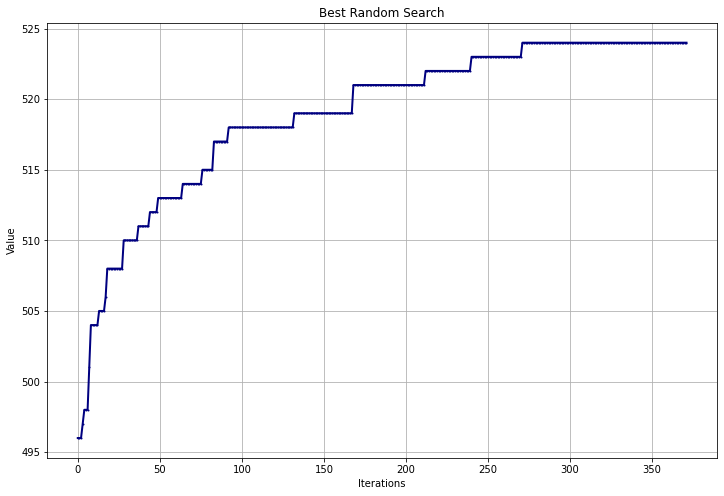

In [71]:
ax = best_curve_rhc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [72]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.001539,489.0,0.0,10,500,0
1,1,0.014729,491.0,2.0,10,500,0
2,2,0.015220,491.0,3.0,10,500,0
3,3,0.015700,491.0,4.0,10,500,0
4,4,0.016642,492.0,6.0,10,500,0
...,...,...,...,...,...,...,...
56566,226,0.152833,517.0,36844.0,100,500,100
56567,227,0.153401,517.0,36845.0,100,500,100
56568,228,0.154433,517.0,36846.0,100,500,100
56569,229,0.155013,517.0,36847.0,100,500,100


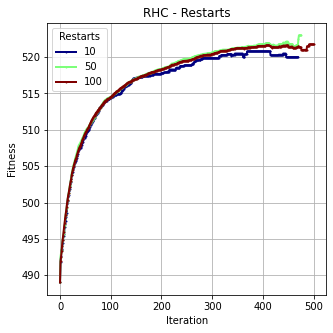

In [70]:
rhc_cr = rhc_run_curves.groupby(['Iteration','Restarts']).agg({'Fitness':'mean'}).reset_index()
ax = rhc_cr.pivot_table(values="Fitness", index="Iteration", columns="Restarts").plot(lw=2, colormap='jet', legend=True
                                                                                          , grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='RHC - Restarts')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/NQueens/nQueen_rhc_restarts.png')

<h3>SA</h3>

In [86]:
%%time

problem = mlrose_hiive.DiscreteOpt(length = number_of_queens, fitness_fn = fitness_cust, 
                             maximize = True, max_val = number_of_queens)

sa = mlrose_hiive.SARunner(problem,
                            experiment_name=experiment_name+ "_SA",
                            output_directory=output_directory, 
                           iteration_list=[500],
                           temperature_list=[ 0.05, 0.1, 0.5, 1, 10, 20, 25],
                   decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay],
#                            temperature_list=[1, 10, 50, 100, 250],
#                            decay_list=[mlrose_hiive.ExpDecay,
#                                        mlrose_hiive.GeomDecay],
                           seed=33, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Wall time: 11.2 s


In [93]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max(), last_iters.FEvals.max())
print(last_iters.Time.mean())

514.5714285714286 524.0 979
0.4915355619048655


In [88]:
print(last_iters.loc[last_iters.schedule_init_temp == 0.05, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 0.1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 0.5, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 10, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 20, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 25, "Time"].mean())
print(last_iters.loc[:, "Time"].mean())

0.37879576666697784
0.3913407333323751
0.4205684666679493
0.4656363000006725
0.5749544333327018
0.5937353333344314
0.6157178999989507
0.4915355619048655


In [89]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve_sa = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve_sa.reset_index(inplace=True)
best_decay

GeomDecay(init_temp=0.05, decay=0.99, min_temp=0.001)

In [90]:
best_index_in_SA_curve = sa_run_curves.Fitness.idxmax()
sa_run_curves.iloc[best_index_in_SA_curve]

Iteration           500
Time           0.367428
Fitness           524.0
FEvals            588.0
Temperature        0.05
max_iters           500
Name: 500, dtype: object

In [91]:
dfp = pd.DataFrame(sa_run_curves)
dfp = dfp.astype({'Temperature':'string'})

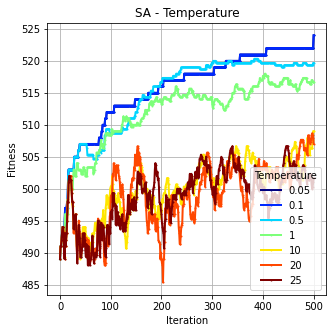

In [92]:
sa_ps = dfp.groupby(['Iteration','Temperature']).agg({'Fitness':'mean'}).reset_index()
ax = sa_ps.pivot_table(values="Fitness", index="Iteration", columns="Temperature").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='SA - Temperature')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/NQueens/nQueen_sa_Temp.png')

Text(0, 0.5, 'Value')

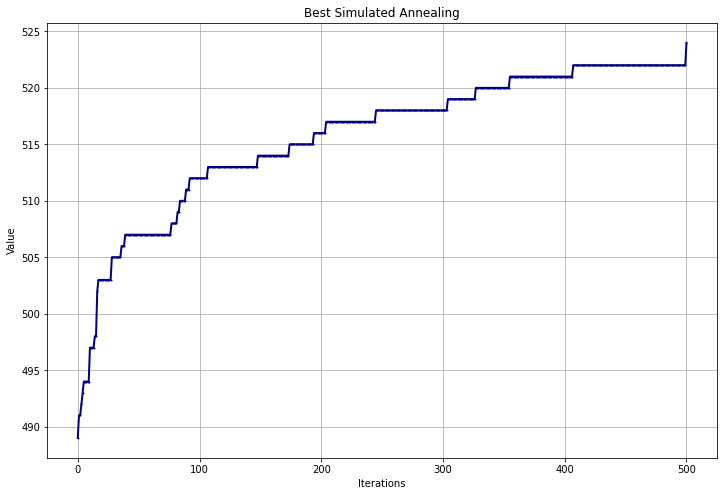

In [38]:
ax = best_curve_sa.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")


<h3>GA</h3>

In [39]:
%%time

problem = mlrose_hiive.DiscreteOpt(length = number_of_queens, fitness_fn = fitness_cust, 
                             maximize = True, max_val = number_of_queens)

ga = mlrose_hiive.GARunner(problem=problem,
                        experiment_name=experiment_name+ "_GA",
                        output_directory=output_directory,
                          seed=44,
                          iteration_list=[200],
                          population_sizes=[20,50,100],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Wall time: 56.3 s


In [40]:

last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
525.0 522.6666666666666 6.243584055555528
Mutation Rate
0.10    522.666667
0.25    523.333333
0.50    522.000000
Name: Fitness, dtype: float64
Population Size
20     520.333333
50     523.000000
100    524.666667
Name: Fitness, dtype: float64
Population Size
20      2.253979
50      5.491923
100    10.984850
Name: Time, dtype: float64


In [41]:
best_index_in_GA_curve = ga_run_curves.Fitness.idxmax()
ga_run_curves.iloc[best_index_in_GA_curve]


Iteration           121.000000
Time                  1.380579
Fitness             525.000000
FEvals             6236.000000
Population Size      50.000000
Mutation Rate         0.250000
max_iters           200.000000
Name: 925, dtype: float64

In [42]:
best_p_size_ga = ga_run_curves.iloc[best_index_in_GA_curve]['Population Size'] 
best_m_rate = ga_run_curves.iloc[best_index_in_GA_curve]['Mutation Rate']  
best_curve_ga = ga_run_curves.loc[ga_run_curves['Population Size'] == best_p_size_ga, :]
best_curve_ga = best_curve_ga.loc[best_curve_ga['Mutation Rate'] == best_m_rate, :]
best_curve_ga.reset_index(inplace=True)
best_p_size_ga

50.0

Text(0, 0.5, 'Value')

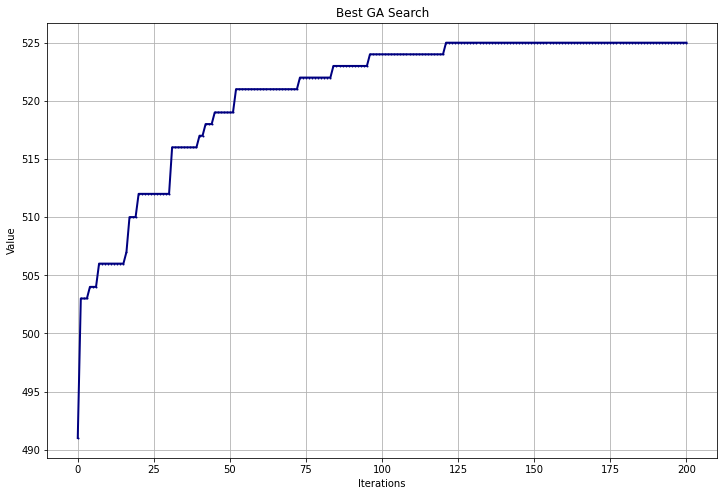

In [43]:
ax = best_curve_ga.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best GA Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [44]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.010298,491.0,20.0,20,0.1,200
1,1,0.029676,501.0,42.0,20,0.1,200
2,2,0.040759,501.0,63.0,20,0.1,200
3,3,0.051839,501.0,84.0,20,0.1,200
4,4,0.062890,502.0,106.0,20,0.1,200
...,...,...,...,...,...,...,...
1804,196,2.200580,524.0,19911.0,100,0.5,200
1805,197,2.211873,524.0,20012.0,100,0.5,200
1806,198,2.222654,525.0,20114.0,100,0.5,200
1807,199,2.233613,525.0,20215.0,100,0.5,200


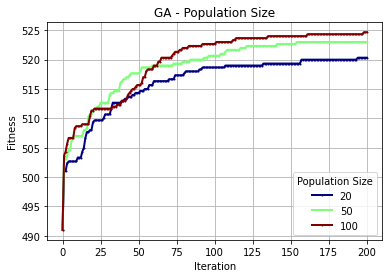

In [45]:
ga_ps = ga_run_curves.groupby(['Iteration','Population Size']).agg({'Fitness':'mean'}).reset_index()
ax = ga_ps.pivot_table(values="Fitness", index="Iteration", columns="Population Size").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='GA - Population Size')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/NQueens/nQueen_ga_p_size.png')

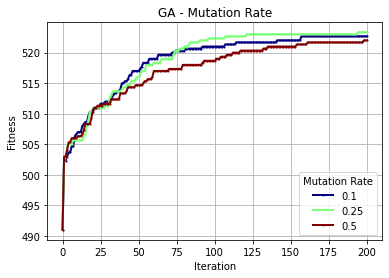

In [46]:
ga_mutaion = ga_run_curves.groupby(['Iteration','Mutation Rate']).agg({'Fitness':'mean'}).reset_index()
ax = ga_mutaion.pivot_table(values="Fitness", index="Iteration", columns="Mutation Rate").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='GA - Mutation Rate')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/NQueens/nQueen_ga_M_Rate.png')

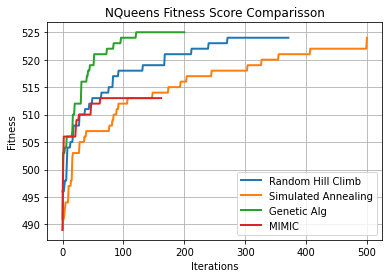

In [47]:
all_curves = {"Random Hill Climb": best_curve_rhc.Fitness, "Simulated Annealing": best_curve_sa.Fitness, "Genetic Alg": best_curve_ga.Fitness, "MIMIC": best_curve_mmc.Fitness}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("NQueens Fitness Score Comparisson")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.grid(visible=True)
plt.savefig('../images/NQueens/nQueen_f_score_compare.png')
plt.show()

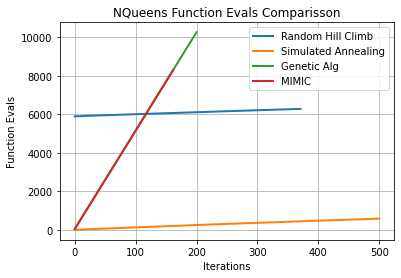

In [48]:
all_curves = {"Random Hill Climb": best_curve_rhc.FEvals, "Simulated Annealing": best_curve_sa.FEvals, "Genetic Alg": best_curve_ga.FEvals, "MIMIC": best_curve_mmc.FEvals}
np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Function Evals")
plt.title("NQueens Function Evals Comparisson")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.grid(visible=True)
plt.savefig('../images/NQueens/nQueen_f_evals_compare.png')
plt.show()

In [49]:
def train_and_time(algo, times, fitness):
    start = time.clock()
    #print(algo())
    best_state, best_fitness,_ = algo()
    end = time.clock()
    times.append(end - start)
    fitness.append(best_fitness)
    

N Queens Problem with  10  Queens &  55 Attacks
N Queens Problem with  18  Queens &  171 Attacks
N Queens Problem with  26  Queens &  351 Attacks
N Queens Problem with  34  Queens &  595 Attacks
N Queens Problem with  42  Queens &  903 Attacks
N Queens Problem with  50  Queens &  1275 Attacks
N Queens Problem with  58  Queens &  1711 Attacks


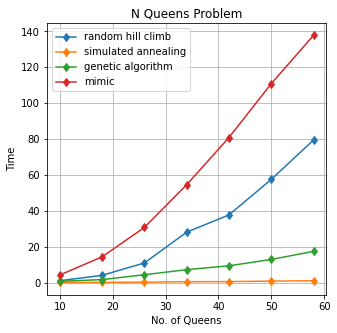

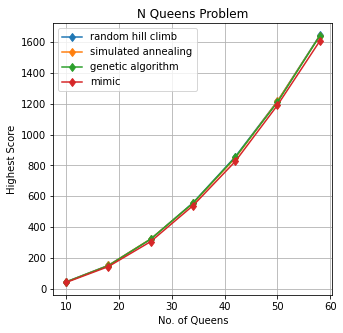

In [97]:
import time
####### Nqueens

cp_hill_times = []
cp_hill_scores = []
cp_hill_curves = []
cp_anneal_times = []
cp_anneal_scores = []
cp_anneal_curves = []
cp_genetic_times = []
cp_genetic_scores = []
cp_genetic_curves = []
cp_mimic_times = []
cp_mimic_scores = []
cp_mimic_curves = []

def possible_attacks(number_of_queens):
    possible_attack = 0
    for i in range(number_of_queens,0,-1):
        possible_attack += i
    return possible_attack

#custom Fitness
def queeens_max(state):
    fitness_cnt = 0
    for i in range(len(state)-1):
        for j in range(i+1, len(state)):
            # check for attacking pairs
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j-i)) \
                and (state[j] != state[i] - (j-i)):
                
                # if noa attack
                fitness_cnt +=1

    return fitness_cnt

fitness_cust = mlrose_hiive.CustomFitness(queeens_max)


def run_nQueens(num_points):
    print ("N Queens Problem with ", num_points, " Queens & ", possible_attacks(num_points), 'Attacks')
    
    n_queens_p = mlrose_hiive.DiscreteOpt(length = num_points, fitness_fn = fitness_cust, maximize = True, max_val = num_points)
    train_and_time(lambda : mlrose_hiive.random_hill_climb(problem=n_queens_p, restarts =100, max_iters= 500, max_attempts= 100, random_state=33),cp_hill_times, cp_hill_scores)
    
    n_queens_p = mlrose_hiive.DiscreteOpt(length = num_points, fitness_fn = fitness_cust, maximize = True, max_val = num_points)
    train_and_time(lambda : mlrose_hiive.simulated_annealing(problem=n_queens_p, schedule= mlrose_hiive.GeomDecay(init_temp=0.5),max_iters=500, max_attempts= 100, random_state=33), cp_anneal_times, cp_anneal_scores)
    
    n_queens_p = mlrose_hiive.DiscreteOpt(length = num_points, fitness_fn = fitness_cust, maximize = True, max_val = num_points)
    train_and_time(lambda : mlrose_hiive.genetic_alg(pop_size = 50, mutation_prob=0.25,  problem=n_queens_p, max_iters=200, max_attempts= 100, random_state=33), cp_genetic_times, cp_genetic_scores)
    
    n_queens_p = mlrose_hiive.DiscreteOpt(length = num_points, fitness_fn = fitness_cust, maximize = True, max_val = num_points)
    train_and_time(lambda : mlrose_hiive.mimic(pop_size = 50, problem=n_queens_p, keep_pct= 0.4, max_iters=200, max_attempts= 100, random_state=33), cp_mimic_times, cp_mimic_scores)
    
#     train_and_time(lambda : mlrose_hiive.random_hill_climb(problem=n_queens_p, max_attempts=10),cp_hill_times, cp_hill_scores)
#     train_and_time(lambda : mlrose_hiive.simulated_annealing(problem=n_queens_p, max_attempts=10), cp_anneal_times, cp_anneal_scores)
#     train_and_time(lambda : mlrose_hiive.genetic_alg(pop_size = 30, problem=n_queens_p, max_attempts=10), cp_genetic_times, cp_genetic_scores)
#     train_and_time(lambda : mlrose_hiive.mimic(pop_size = 30, problem=n_queens_p, max_attempts=10), cp_mimic_times, cp_mimic_scores)

point_range = range(10,66,8)
for p in point_range:
    run_nQueens(p)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(point_range,cp_hill_times,'-d',point_range,cp_anneal_times,'-d',point_range,cp_genetic_times,'-d',point_range,cp_mimic_times,'-d')
plt.title("N Queens Problem")
plt.xlabel("No. of Queens")
plt.ylabel("Time")
plt.legend(["random hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid(visible=True)
plt.savefig('../images/NQueens/nQueen_time.png')
plt.show()

plt.plot(point_range,cp_hill_scores,'-d',point_range,cp_anneal_scores,'-d',point_range,cp_genetic_scores,'-d',point_range,cp_mimic_scores,'-d')
plt.title("N Queens Problem")
plt.xlabel("No. of Queens")
plt.ylabel("Highest Score")
plt.legend(["random hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid(visible=True)
plt.savefig('../images/NQueens/nQueen_h_score.png')
plt.show()